# <center> A Complete Guide to Regularized Regressions </center>

### <center> Support me with an upvote if you find it useful! 👍 </center>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, train_test_split

## Table of Contents

<a id="toc"></a>

- [1. Quick Introduction](#1)
    - 1.1 What is regularization?
    - 1.2 How to regularize a linear model?
        
        
- [2. Regularization Methods](#2)
    - 2.1 L1: Lasso Regularization
    - 2.2 L2: Ridge Regularization
    - 2.3 Elastic Net Regularization
  

- [3. Modelling and Tuning Parameters](#3)

<a id="1"></a>

# <center>Quick Introduction</center>

Have a look at this notebook [A Complete Guide to Linear Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-linear-regression) if you want to know more about linear regression models.

## What is regularization?

Regularization is a technique to prevent linear regression models from **`overfitting`**.

For a linear model, the **complexity will be high** when there are **too many features** used. Complx models are more likely to suffer from overfitting the training data. Therefore, we need to **regularize** the model by **suppress the coefficients** of unimportant features towards zero. 

## How to regularize a linear model?

In linear regression, we compute the best coefficients by minimizing a loss function (most commonly the **sum of squared errors**). We can add a penalty term (**sum of coefficients**) to this loss function as a **constraint** to suppress the coefficients computed.


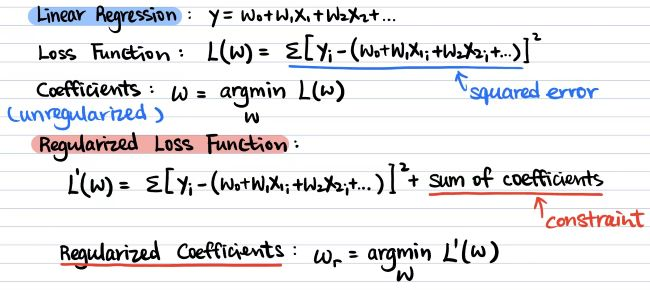

Since the coefficients of a linear model can be either postive or negative, we need to minimize either the **absolute** or the **squared** sum of the coefficients.

These are the two commonly used regularization methods:

1. **`Lasso Regularization (L1)`**: minimize the sum of the abosulute coefficients
2. **`Ridge Regularization (L2)`**: minimize the sum of the squared coefficients

<a id="2"></a>

# <center>Regularization Methods</center>

## L1: Lasso Regularization

**`Lasso Regularization`** aims to minimize the **sum of absolute coefficients** when computing the parameters for a linear regression model:

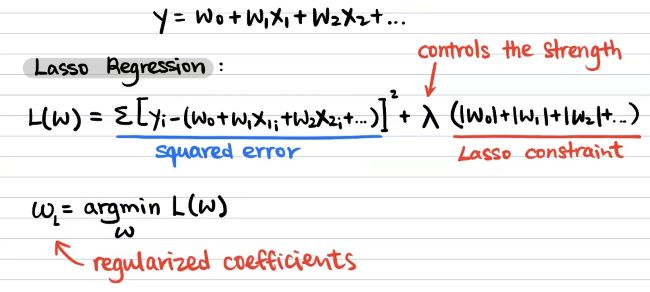

In Lasso regularization, some of the coefficients will be **suppressed to zero**. Therefore, it can also be used as a **feature selection method**. 

Since Lasso regularization **removes unimportant features**, it produces simpler and more interpretable linear regression models.

## L2: Ridge Regularization

In `Ridge Regularization`, the **sum of squared coefficeints** is minimized:

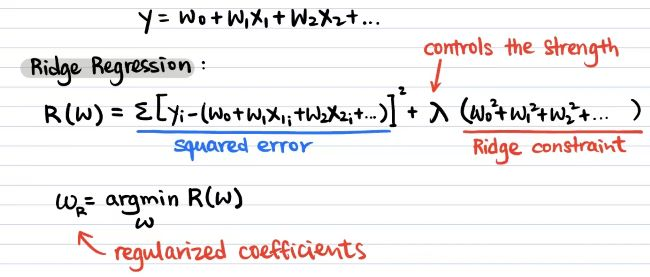

Since Ridge regularization squares the coefficients, **larger coefficients will be suppressed more** and those that are close to zero will be barely affected. Therefore, Ridge regularization will not remove features from a linear model but will instead pruduce **many small coefficients close to zero**.

Ridge regularization is more preferable when **all the features contribute a little** in predicting the output while Lasso regulariztion is better when **some features stand out** with more significant impact on the target variable.

## Elastic Net Regularization

When **`multicolinearity`** exists among the input variables to a linear model, L1 and L2 regularizations behave differently:

1. **L1 Regularization**: one of the ocrrelated predictors will have a large coefficients while the rest will be zero.
2. **L2 Regularization**: coefficients of correlated predictors will be similar

Why don't we **combine the two methods** if we are not sure which one is better -> **`Elastic Net`**:

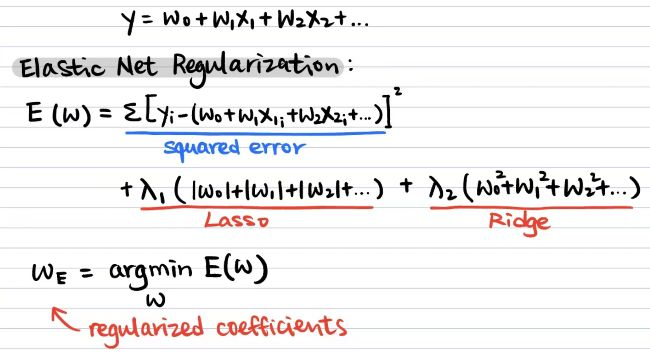

<a id="3"></a>

# <center>Modelling and Tuning Parameters</center>

## Import Data

This is the data from [House Price Prediction](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) but it has already been preprocessed (log-transform, fill missing values, encode categorical variables, drop features) and is ready to be used for modelling.

In [5]:
X_train = pd.read_csv('../input/cleaned-train-x/cleaned_train_X.csv')
y_train = pd.read_csv('../input/cleaned-train-y/cleaned_train_y.csv')

## Evaluation Metric

This is a regression problem and therefure we use **root-mean-square-error** as our evaluation metric.

In [6]:
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=0).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse

## Linear Regression

Linear regression uses all the features provided and is clearly suffering from **overfitting**.

In [7]:
#Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = rmsle_cv(lr)
print(f"Linear Regression score: {round(lr_score.mean(),3)}")

Linear Regression score: 667968215867.886


## Lasso Regression

The lasso regression model in scikit-learn has a hyperparameter called **`alpha`**. This is equivalent to the lambda in the loss function demonstarted above which **controls the strength of regularization**.

Here is what we will do:

1. Train a lasso regression model with the **default alpha value** (1.0)
2. **Tune the alpha value** with cross-validation
3. Train a lasso regression model with the **best alpha value**

Here we use the **RobustScaler()** in combination with our lasso regression to make the model more robust to outliers. 

In [8]:
#Lasso regression model with default alpha value
lasso = make_pipeline(RobustScaler(), Lasso(max_iter=5000, random_state=0))
lasso.fit(X_train, y_train)
lasso_score = rmsle_cv(lasso)
print(f"Lasso Regression score: {round(lasso_score.mean(),3)}")

Lasso Regression score: 0.386


In [9]:
#tune the alpha value with cross-validation
alpha_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
for alpha in alpha_values:
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=alpha, max_iter=5000, random_state=0))
    lasso.fit(X_train, y_train)
    lasso_score = rmsle_cv(lasso)
    print(f"Lasso Regression score: {round(lasso_score.mean(),3)}")

Lasso Regression score: 0.151
Lasso Regression score: 0.147
Lasso Regression score: 0.145
Lasso Regression score: 0.142
Lasso Regression score: 0.146
Lasso Regression score: 0.193
Lasso Regression score: 0.247
Lasso Regression score: 0.377
Lasso Regression score: 0.386
Lasso Regression score: 0.399
Lasso Regression score: 0.399


In [10]:
#use the best alpha value
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.005, max_iter=5000, random_state=0))
lasso.fit(X_train, y_train)
lasso_score = rmsle_cv(lasso)
print(f"Lasso Regression score: {round(lasso_score.mean(),3)}")

Lasso Regression score: 0.142


## Ridge Regression

Similar to above...

In [11]:
#Ridge regression model with default alpha value
ridge = make_pipeline(RobustScaler(), Ridge(max_iter=5000, random_state=0))
ridge.fit(X_train, y_train)
ridge_score = rmsle_cv(ridge)
print(f"Ridge Regression score: {round(ridge_score.mean(),3)}")

Ridge Regression score: 0.153


In [12]:
#tune the alpha value with cross-validation
alpha_values = [0.1, 0.5, 1, 5, 10, 15, 20, 50, 100, 200, 500, 1000]
for alpha in alpha_values:
    ridge = make_pipeline(RobustScaler(), Ridge(alpha=alpha, max_iter=5000, random_state=0))
    ridge.fit(X_train, y_train)
    ridge_score = rmsle_cv(ridge)
    print(f"ridge Regression score: {round(ridge_score.mean(),3)}")

ridge Regression score: 0.153
ridge Regression score: 0.153
ridge Regression score: 0.153
ridge Regression score: 0.152
ridge Regression score: 0.15
ridge Regression score: 0.149
ridge Regression score: 0.149
ridge Regression score: 0.146
ridge Regression score: 0.143
ridge Regression score: 0.14
ridge Regression score: 0.14
ridge Regression score: 0.146


In [13]:
#use the best alpha value
ridge = make_pipeline(RobustScaler(), Ridge(alpha=200, max_iter=5000, random_state=0))
ridge.fit(X_train, y_train)
ridge_score = rmsle_cv(ridge)
print(f"Ridge Regression score: {round(ridge_score.mean(),3)}")

Ridge Regression score: 0.14


## Elastic Net Regression

In the above explanation, we have **λ1 and λ2** in the loss function controlling to the **regularization strength** of lasso and ridge respectively. These two parameters take different forms in the Elastic Net regression model provided by **scikit-learn**.

The Elastic Net regression model in scikit-learn has two key parameters that controls the strength of regularization: **alpha and l1_ratio**. The relationship is:

1. alpha = λ1 + 2*λ2, default = 1.0
2. l1_ratio = λ1 / (λ1 + 2*λ2), default = 0.5

When **l1_ratio = 1**, the Elastic Net regression model becomes a Lasso regression model. Conversely, the model becomes a Ridge regression model when **l1_ratio = 0**.



In [14]:
#Elastic Net regression model with default alpha value
ENet = make_pipeline(RobustScaler(), ElasticNet(max_iter=5000, random_state=0))
ENet.fit(X_train, y_train)
ENet_score = rmsle_cv(ENet)
print(f"Elastic Net Regression score: {round(ENet_score.mean(),3)}")

Elastic Net Regression score: 0.377


In [15]:
ENet_param = {'elasticnet__alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10],
              'elasticnet__l1_ratio': np.arange(0.1,0.9,0.1)}

ENet = make_pipeline(RobustScaler(), ElasticNet(max_iter=5000, random_state=0))
ENet_cv =  GridSearchCV(estimator=ENet, param_grid=ENet_param, 
                        scoring='neg_root_mean_squared_error', cv=5, verbose=3)
ENet_cv.fit(X_train, y_train)
ENet_cv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1;, score=-0.122 total time=   0.4s
[CV 2/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1;, score=-0.162 total time=   0.4s
[CV 3/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1;, score=-0.167 total time=   0.5s
[CV 4/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1;, score=-0.110 total time=   0.4s
[CV 5/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1;, score=-0.194 total time=   0.4s
[CV 1/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.2;, score=-0.120 total time=   0.3s
[CV 2/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.2;, score=-0.160 total time=   0.3s
[CV 3/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.2;, score=-0.165 total time=   0.3s
[CV 4/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.2;, score=-0.110 total time=   0.3s
[CV 5/5] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.2;, 

{'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.30000000000000004}

In [17]:
#use the best alpha value
ENet = make_pipeline(RobustScaler(), ElasticNet(max_iter=5000, alpha=0.01, l1_ratio=0.3, random_state=0))
ENet.fit(X_train, y_train)
ENet_score = rmsle_cv(ENet)
print(f"Elastic Net Regression score: {round(ENet_score.mean(),3)}")

Elastic Net Regression score: 0.141
